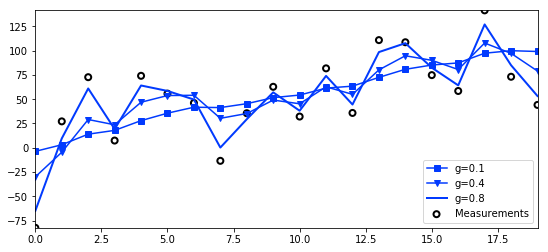

In [86]:
%matplotlib inline 
from kf_book.gh_internal import plot_g_h_results
from kf_book.gh_internal import book_plots
import matplotlib.pylab as pylab
from numpy.random import randn
import numpy as np

def g_h_filter(data, x0, dx, g, h, dt=1.):
    x_est = x0
    results = []
    for z in data:
        #prediction step
        x_pred = x_est + (dx*dt)
        dx = dx

        # update step
        residual = z - x_pred
        dx = dx + h * (residual) / dt
        x_est = x_pred + g * residual     
        results.append(x_est)  
    return np.array(results)

def gene_data(x0, dx, count, noise_factor, accel=0.):
    z=[]
    for i in range(count):
        z.append(x0 + dx*i + randn()*noise_factor)
        dx += accel
    return np.array(z)

np.random.seed(100)
measurements = gene_data(x0=5., dx=5., count=20, noise_factor=50, accel=0.) # 100 data points that starts at 5, has a derivative of 2, a noise scaling factor of 100.
data1 = g_h_filter(data=measurements, x0=0., dx=5., dt=1., g=0.1, h=0.01)
data2 = g_h_filter(data=measurements, x0=0., dx=5., dt=1., g=0.4, h=0.01)
data3 = g_h_filter(data=measurements, x0=0., dx=5., dt=1., g=0.8, h=0.01)

with book_plots.figsize(y=4):
    book_plots.plot_measurements(measurements, lw=1, color='k')
    book_plots.plot_filter(data1, label='g=0.1', marker='s')
    book_plots.plot_filter(data2, label='g=0.4', marker='v')
    book_plots.plot_filter(data3, label='g=0.8', lw=2)
    plt.legend(loc=4)
    #book_plots.set_limits([20,40], [50, 250]) #g=0.2 and h=0.02, initial gusse for x to be 5
#plot_g_h_results(measurements, data)




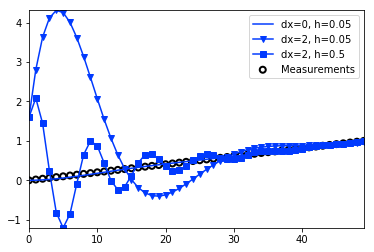

In [89]:
%matplotlib inline 
from kf_book.gh_internal import plot_g_h_results
from kf_book.gh_internal import book_plots
import matplotlib.pylab as pylab
from numpy.random import randn
import numpy as np

zs = np.linspace(0, 1, 50)

data1 = g_h_filter(data=zs, x0=0, dx=0., dt=1., g=.2, h=0.05)
data2 = g_h_filter(data=zs, x0=0, dx=2., dt=1., g=.2, h=0.05)
data3 = g_h_filter(data=zs, x0=0, dx=2., dt=1., g=.2, h=0.5)

book_plots.plot_measurements(zs)
book_plots.plot_filter(data1, label='dx=0, h=0.05')
book_plots.plot_filter(data2, label='dx=2, h=0.05', marker='v')
book_plots.plot_filter(data3, label='dx=2, h=0.5',  marker='s')
plt.legend(loc=1);



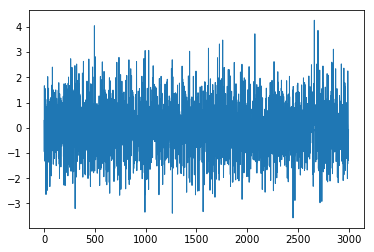

In [58]:
%matplotlib inline 
import matplotlib.pyplot as plt
from numpy.random import randn

x=[randn() for _ in range(3000)]
plt.plot(x,lw=1)